# House Prices : Advanced Regression Techniques(Part 2)
- Predict sales prices

## Data Dictonary

### variable

In [779]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [780]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 80)

%matplotlib inline

In [781]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [782]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,4.0,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,2.0,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,5.0,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,1.0,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,4.0,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [783]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,3,5,80.0,11622,1,3,1,3,4,1,24,3,1,1,3,5,6,1.0,0,5,7,12,10,2,0.0,3,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,3,4,81.0,14267,1,3,3,3,1,1,24,1,1,1,3,6,6,1.0,0,1,7,14,15,1,108.0,3,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,14,4,74.0,13830,1,3,3,3,4,1,14,1,1,1,4,5,5,4.0,3,5,7,12,10,2,0.0,3,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,14,4,78.0,9978,1,3,3,3,4,1,14,1,1,1,4,6,6,4.0,3,5,7,12,10,1,20.0,3,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,13,4,43.0,5005,1,3,3,1,4,1,8,1,1,2,3,8,5,4.0,2,5,7,4,2,2,0.0,2,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [784]:
train.drop(train.columns[0], axis = 1, inplace = True)
test.drop(test.columns[0], axis = 1, inplace = True)

## Feature Engineering

In [785]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
train_test_data = [train, test]

In [786]:
train_test_data[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,4.0,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,2.0,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,5.0,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,1.0,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,4.0,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 0. Functions

In [787]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

In [788]:
def train_test_info(feature, **options):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        if options.get('sort') == True:
            print('Kind of value unique : ', np.sort(data[feature].unique()))
        elif options.get('cut') == True:
            print('Kind of value unique : ----')
        else:
            print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [789]:
def mapping(feature, **options):
    uni1 = set(train_raw[feature].unique())
    uni2 = set(test_raw[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    if options.get('no') == True:
        uni.remove(np.nan)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    for data in train_test_data:
        data[feature] = data[feature].map(feature_mapping)
    train_test_info(feature)
    return feature_mapping

In [790]:
def mapping2(feature, **options):
    uni1 = set(corr[feature].unique())
    uni2 = set(corr[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    if options.get('no') == True:
        uni.remove(np.nan)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    corr[feature] = corr[feature].map(feature_mapping)
    return feature_mapping

### 28. ExterCond
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [791]:
train_test_info('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']




In [792]:
mapping('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]




{'Ex': 4, 'Fa': 2, 'Gd': 1, 'Po': 3, 'TA': 0}

### 29. Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [793]:
train_test_info('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']




In [794]:
mapping('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [3 5 2 0 4 1]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 3 2 1 4 0]




{'BrkTil': 2, 'CBlock': 5, 'PConc': 3, 'Slab': 4, 'Stone': 1, 'Wood': 0}

### 30. BsmtQual
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [795]:
train_test_info('BsmtQual')

Information of BsmtQual 

Train
Number of null :  37
Number of value unique :  5
Kind of value unique :  ['Gd' 'TA' 'Ex' nan 'Fa']


Test
Number of null :  44
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa' nan]




### 30-1. Fill NaN

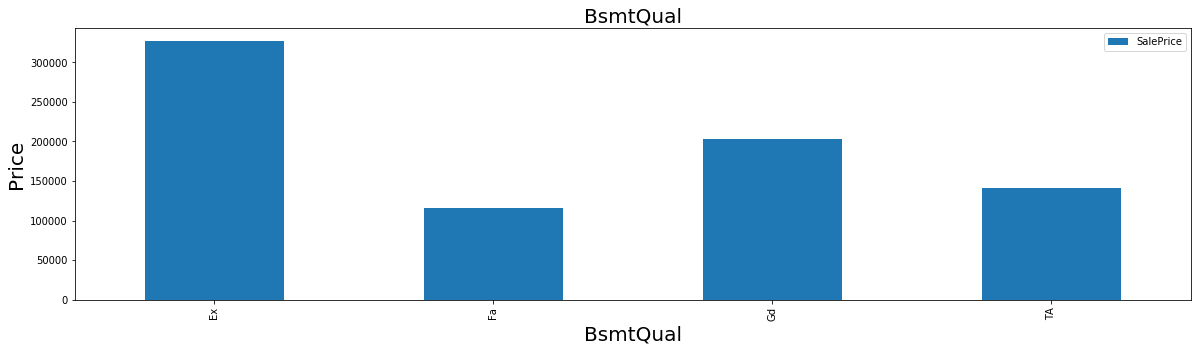

In [796]:
chart_bar('BsmtQual')

In [797]:
mapping('BsmtQual')

Information of BsmtQual 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2 0 4 1 3]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 2 4 3 1]




{'TA': 0, nan: 1, 'Gd': 2, 'Fa': 3, 'Ex': 4}

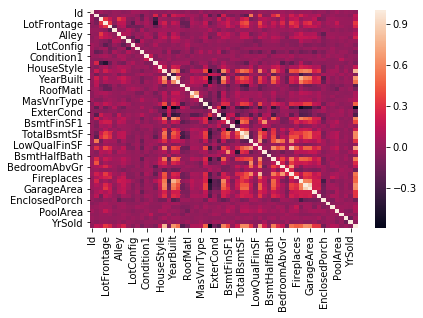

In [798]:
df1 = train.corr()
plt.figure()
sns.heatmap(df1)

In [799]:
df1['BsmtQual'].sort_values(ascending = False).iloc[1:].head()

YearBuilt      0.672179
OverallQual    0.599639
SalePrice      0.593734
GarageYrBlt    0.590465
GarageCars     0.502547
Name: BsmtQual, dtype: float64

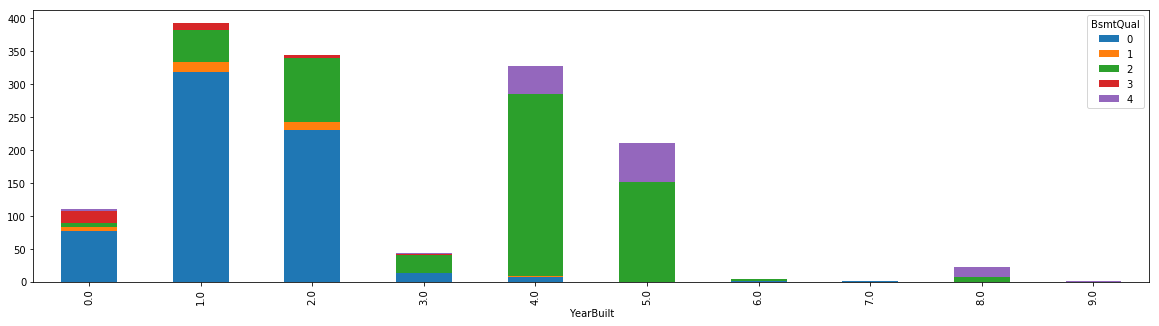

In [800]:
train[['YearBuilt', 'BsmtQual']].groupby(['YearBuilt', 'BsmtQual']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True)

### 30-2. mapping

In [801]:
train.loc[(train['YearBuilt'] == 0) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 1) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 2) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 3) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 4) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 5) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 6) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 7) & (train['BsmtQual'] == 1), 'BsmtQual'] = 0
train.loc[(train['YearBuilt'] == 8) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4
train.loc[(train['YearBuilt'] == 9) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4

In [802]:
test.loc[(test['YearBuilt'] == 0) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 1) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 2) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 3) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 4) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 5) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 6) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 7) & (test['BsmtQual'] == 1), 'BsmtQual'] = 0
test.loc[(test['YearBuilt'] == 8) & (test['BsmtQual'] == 1), 'BsmtQual'] = 4
test.loc[(test['YearBuilt'] == 9) & (test['BsmtQual'] == 1), 'BsmtQual'] = 4

In [803]:
train_test_info('BsmtQual')

Information of BsmtQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 0 4 3]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 2 4 3]




### 31. BsmtCond
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [804]:
train_test_info('BsmtCond')

Information of BsmtCond 

Train
Number of null :  37
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' nan 'Fa' 'Po']


Test
Number of null :  45
Number of value unique :  5
Kind of value unique :  ['TA' 'Po' 'Fa' 'Gd' nan]




### 31-1. Fill NaN

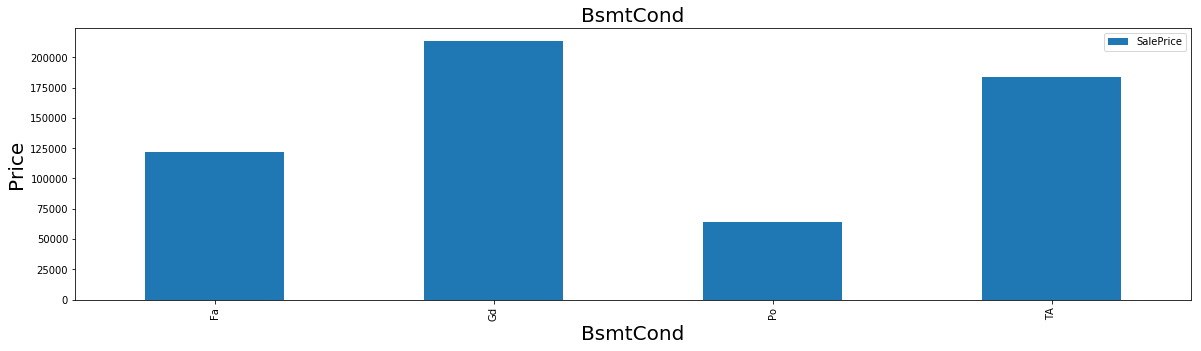

In [805]:
chart_bar('BsmtCond')

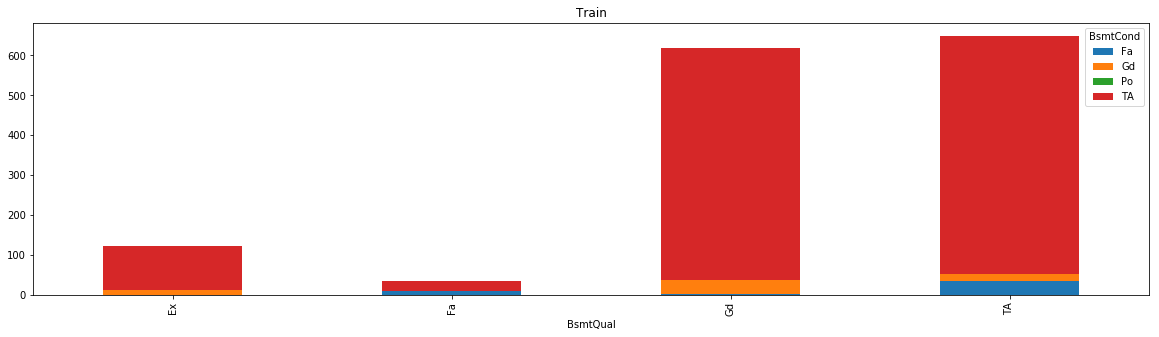

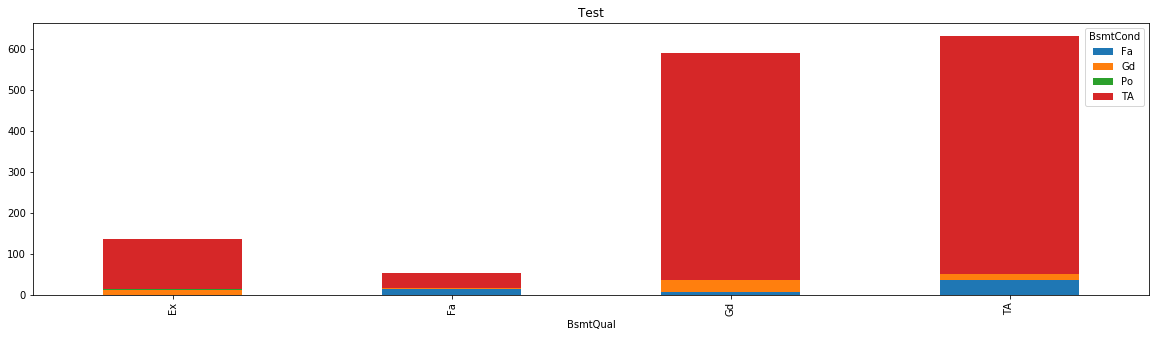

In [806]:
plt.figure()
train_raw[['BsmtQual', 'BsmtCond']].groupby(['BsmtQual', 'BsmtCond']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = 'Train')
test_raw[['BsmtQual', 'BsmtCond']].groupby(['BsmtQual', 'BsmtCond']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = 'Test')

In [807]:
for data in train_test_data:
    data['BsmtCond'] = data['BsmtCond'].fillna('TA')
mapping('BsmtCond')

Information of BsmtCond 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 2 3 4]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 4 3 2]




{'TA': 0, nan: 1, 'Gd': 2, 'Fa': 3, 'Po': 4}

### 32. BsmtExposure
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [808]:
train_test_info('BsmtExposure')

Information of BsmtExposure 

Train
Number of null :  38
Number of value unique :  5
Kind of value unique :  ['No' 'Gd' 'Mn' 'Av' nan]


Test
Number of null :  44
Number of value unique :  5
Kind of value unique :  ['No' 'Gd' 'Mn' 'Av' nan]




### 32-1. Fill NaN

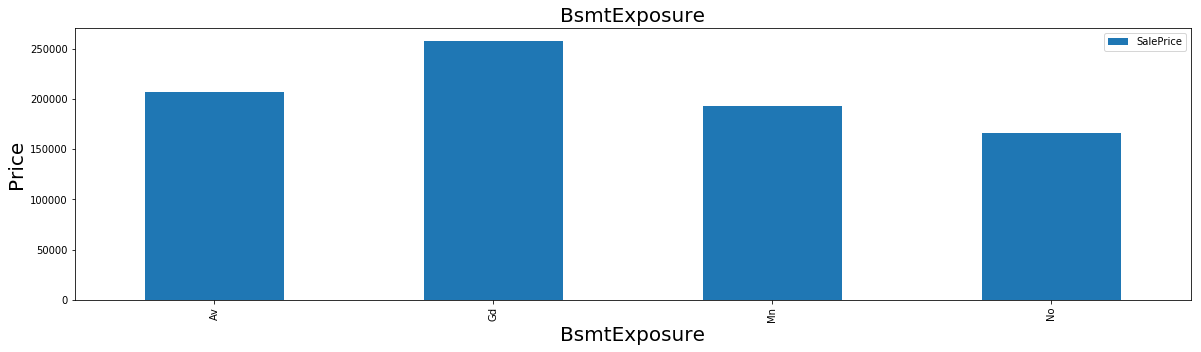

In [809]:
chart_bar('BsmtExposure')

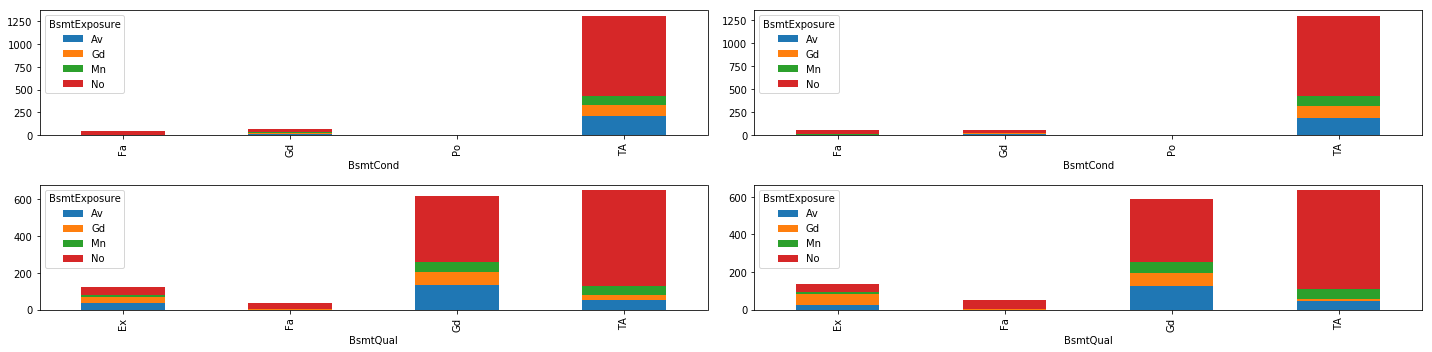

In [810]:
fig, axes = plt.subplots(2,2)
train_raw[['BsmtCond', 'BsmtExposure']].groupby(['BsmtCond', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[0][0])
test_raw[['BsmtCond', 'BsmtExposure']].groupby(['BsmtCond', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[0][1])
train_raw[['BsmtQual', 'BsmtExposure']].groupby(['BsmtQual', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[1][0])
test_raw[['BsmtQual', 'BsmtExposure']].groupby(['BsmtQual', 'BsmtExposure']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,5), ax = axes[1][1])
plt.tight_layout()

In [811]:
for data in train_test_data:
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No')
mapping('BsmtExposure')

Information of BsmtExposure 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 3 1 4]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 3 1 4]




{nan: 0, 'Mn': 1, 'No': 2, 'Gd': 3, 'Av': 4}

### 33. BsmtFinType1
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [812]:
train_test_info('BsmtFinType1')

Information of BsmtFinType1 

Train
Number of null :  37
Number of value unique :  7
Kind of value unique :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


Test
Number of null :  42
Number of value unique :  7
Kind of value unique :  ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]




### 33-1. Fill NaN

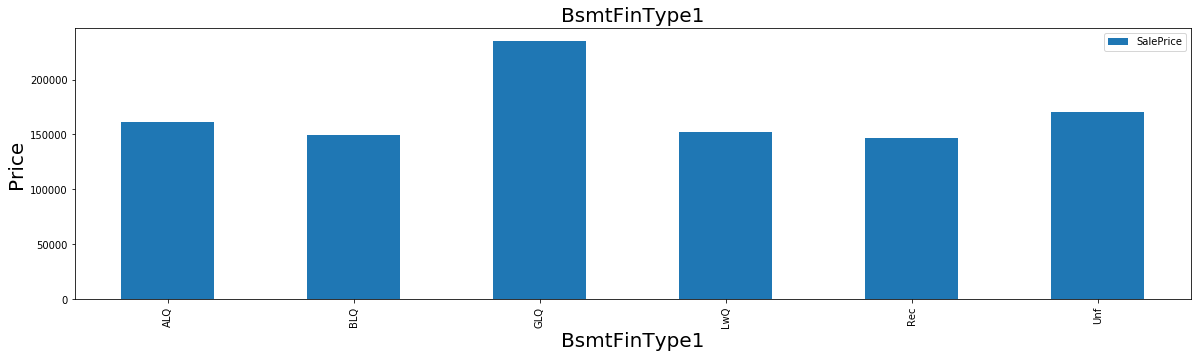

In [813]:
chart_bar('BsmtFinType1')

In [814]:
def compare(feature1, feature2):
    train_raw[[feature1, feature2]].groupby([feature1, feature2]).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True, title = feature1)

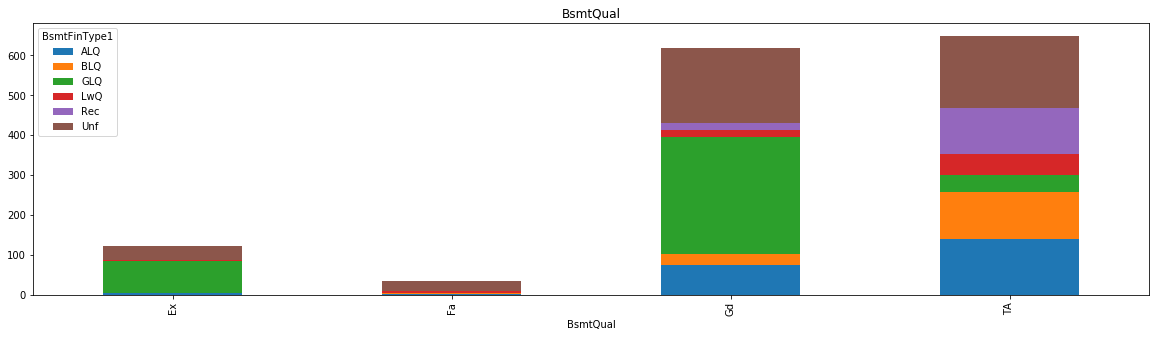

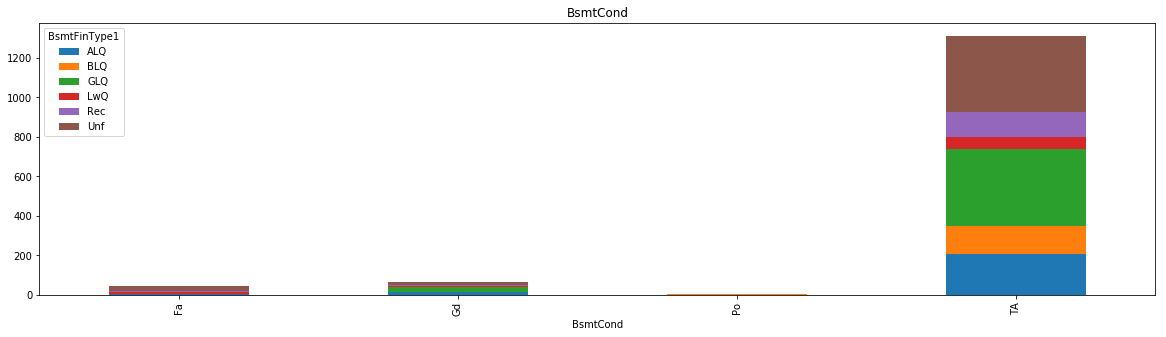

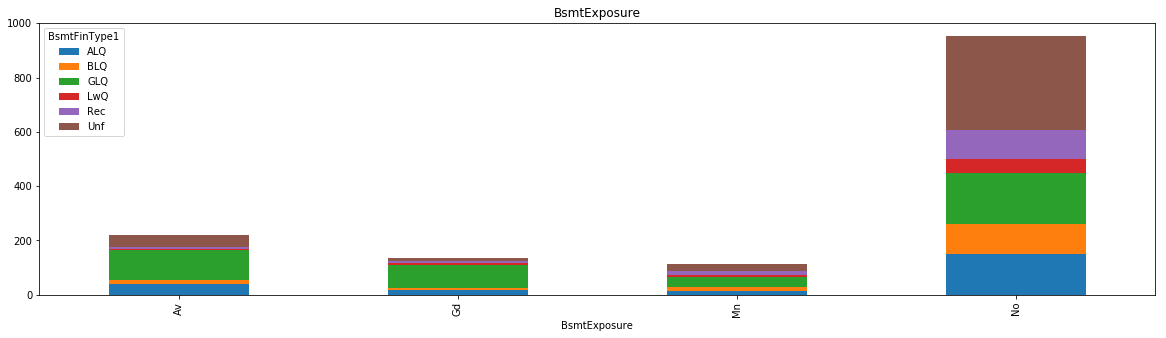

In [815]:
plt.figure()
compare('BsmtQual', 'BsmtFinType1')
compare('BsmtCond', 'BsmtFinType1')
compare('BsmtExposure', 'BsmtFinType1')

In [816]:
corr = train.copy()
mapping2('BsmtFinType1')
df = corr.corr()
df['BsmtFinType1'].sort_values(ascending = False)

BsmtFinType1     1.000000
ExterQual        0.301176
Foundation       0.239991
BsmtFinSF2       0.201049
Neighborhood     0.152224
OverallCond      0.115347
EnclosedPorch    0.107592
BedroomAbvGr     0.095640
BsmtUnfSF        0.069198
BsmtCond         0.067608
ExterCond        0.066780
LowQualFinSF     0.052027
ScreenPorch      0.047221
BsmtHalfBath     0.032561
MoSold           0.032340
RoofMatl         0.031590
MiscVal          0.030014
Id               0.022328
Condition2       0.013061
3SsnPorch        0.011712
RoofStyle        0.011241
MSZoning         0.009675
LotArea         -0.004650
Condition1      -0.005208
Street          -0.011973
LandSlope       -0.015246
PoolArea        -0.016185
BldgType        -0.016909
2ndFlrSF        -0.020030
LotConfig       -0.026234
                   ...   
Fireplaces      -0.040599
YrSold          -0.040792
KitchenAbvGr    -0.040994
MasVnrType      -0.046846
LotShape        -0.047556
Exterior2nd     -0.049238
LandContour     -0.058647
Exterior1st 

In [817]:
for data in train_test_data:
    data.drop('BsmtFinType1', axis = 1, inplace = True)

### 34. BsmtFinSF1
Type 1 finished square feet

In [818]:
train_test_info('BsmtFinSF1')

Information of BsmtFinSF1 

Train
Number of null :  0
Number of value unique :  637
Kind of value unique :  [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614

### 34-1. Fill NaN

In [819]:
test['BsmtFinSF1'] = round(test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean()))
train_test_info('BsmtFinSF1')

Information of BsmtFinSF1 

Train
Number of null :  0
Number of value unique :  637
Kind of value unique :  [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614

### 35. BsmtFinType2
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [820]:
train_test_info('BsmtFinType2')

Information of BsmtFinType2 

Train
Number of null :  38
Number of value unique :  7
Kind of value unique :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


Test
Number of null :  42
Number of value unique :  7
Kind of value unique :  ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]




### 35-1. Fill NaN

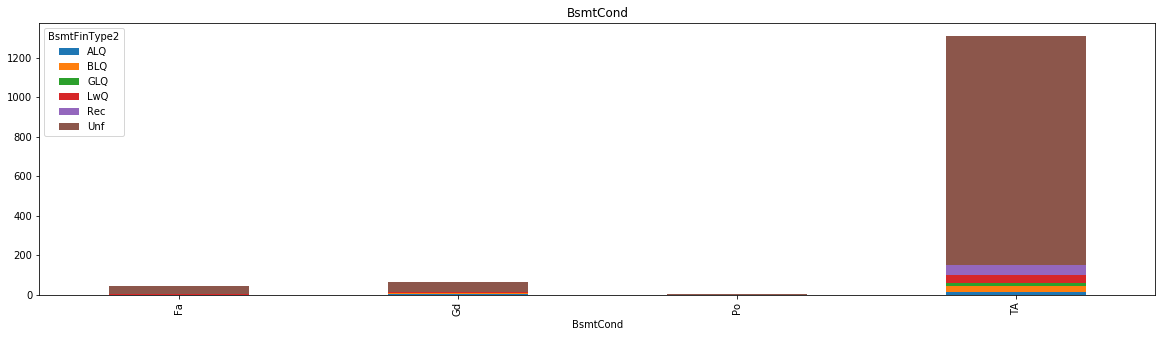

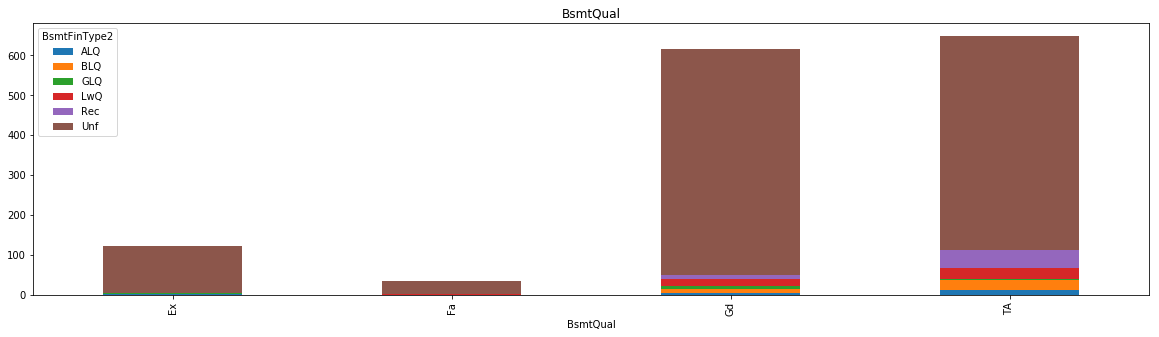

In [821]:
plt.figure()
compare('BsmtCond', 'BsmtFinType2')
compare('BsmtQual', 'BsmtFinType2')

In [822]:
for data in train_test_data:
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')
mapping('BsmtFinType2')

Information of BsmtFinType2 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [3 6 2 4 5 1]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 3 4 6 1 2]




{nan: 0, 'GLQ': 1, 'ALQ': 2, 'Unf': 3, 'Rec': 4, 'LwQ': 5, 'BLQ': 6}

### 36. BsmtFinSF2
Type 2 finished square feet

In [823]:
train_test_info('BsmtFinSF2')

Information of BsmtFinSF2 

Train
Number of null :  0
Number of value unique :  144
Kind of value unique :  [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


Test
Number of null :  1
Number of value unique :  162
Kind of value unique :  [ 144.    0.   78.  859.  981.   42.   46.  162.  174.  350.  263. 1073.
   12.

### 36-1. Fill NaN

In [824]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(round(train['BsmtFinSF2'].mean()))
train_test_info('BsmtFinSF2')

Information of BsmtFinSF2 

Train
Number of null :  0
Number of value unique :  144
Kind of value unique :  [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]


Test
Number of null :  0
Number of value unique :  162
Kind of value unique :  [ 144.    0.   78.  859.  981.   42.   46.  162.  174.  350.  263. 1073.
   12.

### 37. BsmtUnfSF
Unfinished square feet of basement area

In [825]:
train_test_info('BsmtUnfSF')

Information of BsmtUnfSF 

Train
Number of null :  0
Number of value unique :  780
Kind of value unique :  [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78 

### 37-1. Fill NaN

In [827]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(round(train['BsmtUnfSF'].mean()))
train_test_info('BsmtUnfSF')

Information of BsmtUnfSF 

Train
Number of null :  0
Number of value unique :  780
Kind of value unique :  [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78 

### 38. TotalBsmtSF
Total square feet of basement area

In [828]:
train_test_info('TotalBsmtSF')

Information of TotalBsmtSF 

Train
Number of null :  0
Number of value unique :  721
Kind of value unique :  [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  68

### 38-1. Fill NaN

In [829]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(round(train['TotalBsmtSF'].mean()))
train_test_info('TotalBsmtSF')

Information of TotalBsmtSF 

Train
Number of null :  0
Number of value unique :  721
Kind of value unique :  [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  68

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)